# Plot results of iDMRG on the charge-4*e* model

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import os
import pickle
import matplotlib_inline
matplotlib_inline.backend_inline.set_matplotlib_formats("svg")
plt.rc('font', size = 8)

### Transfer Matrix

['TMoverlaps4e_delta_-0.500_t_0.600_r_0.200.pkl']


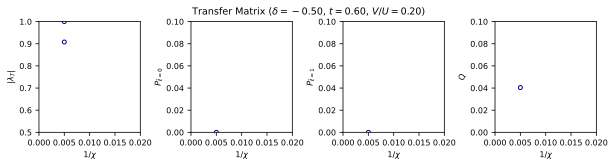

In [2]:
#Choose model parameters for the plot
delta, t, r = - 0.5, 0.6, 0.2
#Collect file for delta, t, r (and varying bond dimension chi)
path = "./TransferMatrix/"
files = [f for f in os.listdir(path) if f.startswith("TMoverlaps4e_delta_{:.3f}_t_{:.3f}_r_{:.3f}".format(delta, t, r))]
print(files)
#Plot Transfer matrix spectrum and subleading eigenvector overlaps
fig, ax = plt.subplots(1, 4, figsize=(10, 2))
ax = ax.flatten()
args = {"markerfacecolor":"None", "marker":"o", "markersize":4, "linewidth":0.5}

fig.suptitle("Transfer Matrix ($\delta={:.2f}$, $t={:.2f}$, $V/U={:.2f}$)".format(delta, t, r))
for j, ylab in zip(range(len(ax)), ["$|\lambda_T|$", r"$P_{\bar{\ell}=0}$", r"$P_{\bar{\ell}=1}$", "$Q$"]):
    ax[j].set(xlim = (0, 1/50.), ylim = (0.5, 1) if j==0 else (0, 0.1), ylabel=ylab, xlabel = "$1/\chi$")

for file in files:
    data = pickle.load(open(path + file, 'rb'))

    chis = [1/chi for chi in data["chis"]]
    evals = [np.abs(tm_data["evals"][:2]) for tm_data in data["chis"].values()]
    ax[0].plot(chis,  evals, color="darkblue", **args)

    for j in range(3):
            overlaps = [np.abs(tm_data["overlaps"][0][j]) for tm_data in data["chis"].values()]
            ax[1+j].plot(chis, overlaps, color="darkblue", **args)

plt.subplots_adjust(wspace=0.5)
plt.show()

### Correlations

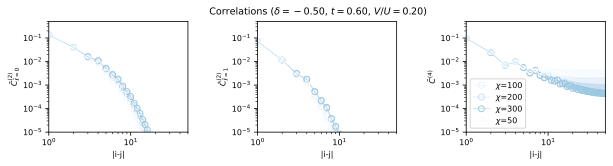

In [3]:
#Choose model parameters for the correlation plot
delta, t, r = - 0.5, 0.6, 0.2

#Collect file for delta, t, r (and varying bond dimension)
path = "./iDMRG_charge4e/"
files = [f for f in os.listdir(path) if f.startswith("charge4eiDMRG_delta_{:.3f}_t_{:.3f}_r_{:.3f}".format(delta, t, r))]
files = np.sort(files)
#Plot correlations
fig, ax = plt.subplots(1, 3, figsize=(10, 2))
ax = ax.flatten()

cmap = mpl.colormaps['Blues']
chi_min, chi_max = 50, 700
norm = mpl.colors.Normalize(vmin=chi_min, vmax=chi_max)

fig.suptitle("Correlations ($\delta={:.2f}$, $t={:.2f}$, $V/U={:.2f}$)".format(delta, t, r))
for axx, ylab in zip(ax, [r"$\bar{C}^{(2)}_{\bar{\ell}=0}$", r"$\bar{C}^{(2)}_{\bar{\ell}=1}$", r"$\bar{C}^{(4)}$"]):
    axx.set(xlim = (1, 50), ylim = (1e-5, 0.5), xscale='log', yscale='log', ylabel=ylab, xlabel = "|i-j|")

xvals = np.arange(0, 50, 1)
for file in files:
    data = pickle.load(open( path + file, 'rb'))
    chi = data["iDMRG_convergence"]["max_chi"][-1]
    for j, corr in zip(range(3), [data["corr2"][0], data["corr2"][1], data["corr4"]]):
        ax[j].plot(xvals, np.abs(corr), color=cmap(norm(chi)), lw=0.5, marker="o", 
                   markerfacecolor="none", label="$\chi$={}".format(chi))

plt.legend(loc="best")
plt.subplots_adjust(wspace=0.5)

### Susceptibility

0.0001 0 -0.0004373367118456929 0.03846448794374125
[[ 1.00000000e+02  1.00000000e-04 -4.37336712e-04]]
[]


IndexError: too many indices for array: array is 1-dimensional, but 2 were indexed

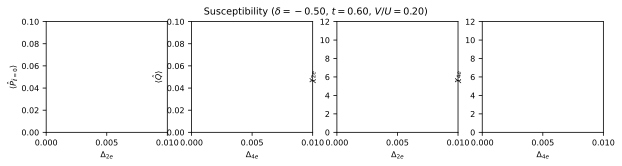

In [7]:
#Choose model parameters for the susceptibility plot
delta, t, r = -0.5, 0.6, 0.2
path = "./iDMRG_charge4e_susceptibility/"

#Collect file for delta, t, r (and varying bond dimension)
files = [f for f in os.listdir(path) if f.__contains__("delta_{:.3f}_t_{:.3f}_r_{:.3f}".format(delta, t, r))]
files = np.sort(files)
#Plot susceptibility
fig, ax = plt.subplots(1, 4, figsize=(10, 2))
ax = ax.flatten()

cmap = mpl.colormaps['Blues']
chi_min, chi_max = 40, 100
norm = mpl.colors.Normalize(vmin=chi_min, vmax=chi_max)

fig.suptitle("Susceptibility ($\delta={:.2f}$, $t={:.2f}$, $V/U={:.2f}$)".format(delta, t, r))
for j, ylab in zip(range(len(ax)), [r"$\langle\hat{P}_{\bar{\ell}=0}\rangle$", r"$\langle\hat{Q}\rangle$", "$\chi_{2e}$", "$\chi_{4e}$"]):
    ax[j].set_xticks([0, 0.5*1e-2, 1e-2])
    ax[j].set(xlim = (0, 0.01), ylim = (0, 0.1 if j<2 else 12), ylabel=ylab,\
                xlabel = "$\Delta_{"+"{:d}".format(2 if j%2==0 else 4)+"e}$")

xvals = np.arange(0, 50, 1)
order_param2e, order_param4e = [], []
for file in files:
    data = pickle.load(open(path + file, 'rb'))
    chi = data["dmrg_params"]["chi_list"][51]
    
    Del2, Del4, P, Q = data["model_params"]["Del2"], data["model_params"]["Del4"], data["P"][0], data["Q"]
    print(Del2, Del4, P, Q)
    if np.isclose(Del4, 0):
        order_param2e.append([chi, Del2, P])
    if np.isclose(Del2, 0):
        order_param4e.append([chi, Del4, Q])

    if data["iDMRG_convergence"]["sweep"][-1] == data["dmrg_params"]["max_sweeps"]:
        print("not converged")

order_param2e, order_param4e = np.array(order_param2e), np.array(order_param4e)
print(order_param2e)
print(order_param4e)
for j, order_param in zip(range(2), [order_param2e, order_param4e]):
    chis = np.unique(order_param[:, 0])
    for chi in chis:
        op = order_param[np.where(order_param[:, 0] == chi)]
        if len(op)<2:
            continue
        op = op[np.argsort(op[:, 1])]
        op[:, 2] = np.abs(op[:, 2])
        #Plot expectation values of the order parameters
        ax[j].plot(op[:, 1], np.abs(op[:, 2]), color=cmap(norm(chi)), lw=0.5, marker="o", 
                        markerfacecolor="none", label="chi={}".format(chi))
        #Plot susceptibility
        derivative = ((np.abs(op[:, j]) - np.roll(np.abs(op[:, j]), -1))/(op[:, 1] - np.roll(op[:, 1], -1)))[:-1]
        ax[j+2].plot(op[:, 1][:-1], np.abs(derivative), color=cmap(norm(chi)), lw=0.5, marker="o", 
                        markerfacecolor="none", label="$\chi$={:d}".format(int(chi)))

ax[0].legend(loc="best")
ax[3].legend(loc="best")
plt.subplots_adjust(wspace=0.5)